Create Datasets

In [ ]:
import pandas as pd

sensus = {
    'tinggi':[158,170,183,191,155,163,180,158,178],
    'berat':[64,86,84,80,49,59,67,54,67],
    'jk':['pria','pria','pria','pria','wanita','wanita','wanita','wanita','wanita']
}

sensus_df = pd.DataFrame(sensus)
sensus_df

Visualisasi data 

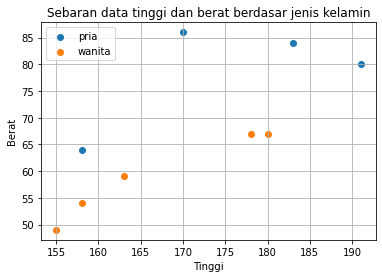

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
  ax.scatter(d['tinggi'],d['berat'],label=jk)

plt.legend(loc='upper left')
plt.title("Sebaran data tinggi dan berat berdasar jenis kelamin")
plt.xlabel("Tinggi")
plt.ylabel("Berat")
plt.grid()
plt.show()

Preprocessing Dataset

In [ ]:
import numpy as np
x_train = np.array(sensus_df[['tinggi','berat']])
y_train = np.array(sensus_df['jk'])

print("X train : ", x_train)
print("Y train : ", y_train)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print("Y train", y_train)

In [ ]:
y_train = y_train.flatten()
print("Y train : ",y_train)

Training KNN Classification Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier

k=3
model = KNeighborsClassifier(n_neighbors=k)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Prediksi Jenis Kelamin

In [20]:
tinggi_badan = 155
berat_badan = 70
x_new = np.array([tinggi_badan, berat_badan]).reshape(1,-1)
x_new

array([[155,  70]])

In [21]:
y_new = model.predict(x_new)
y_new

array([1])

In [22]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

Visualisasi Nearest Neighboor

In [ ]:
fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
  ax.scatter(d['tinggi'], d['berat'],label=jk)

plt.scatter(tinggi_badan, berat_badan, marker='s',color='red',label='misterius')

plt.legend(loc='upper left')
plt.title('Sebaran Data Tinggi badan, Berat Badan, dan jenis kelamin')
plt.xlabel("Tinggi badan")
plt.ylabel("Berat badan")
plt.grid(True)
plt.show()

Kalkulasi Distance (Euclidean Distance)

In [ ]:
misterius = np.array([tinggi_badan,berat_badan])
misterius

In [ ]:
x_train

In [ ]:
from scipy.spatial.distance import euclidean

data_jarak = [euclidean(misterius,d) for d in x_train]
data_jarak

In [ ]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

Evaluasi KNN Classification Model

In [ ]:
# Testing Set
x_test = np.array([[168,65], [100,96],[160, 52],[169, 67]])
y_test = lb.transform(np.array(['pria','pria','wanita','wanita'])).flatten()

print("x test", x_test)
print("y test", y_test)

In [32]:
# Prediksi terhadap testing set
y_pred = model.predict(x_test)
y_pred

array([1, 0, 1, 1])

In [ ]:
# Accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("Accuracy : ",acc)

In [ ]:
# Precision
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)
print("Precision : ",prec)

In [ ]:
# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall : ",recall)

In [ ]:
# F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1 Score : ",f1)

Classification Report

In [38]:
from sklearn.metrics import classification_report
classification = classification_report(y_test, y_pred)
print("Classification Report : ",classification)

Classification Report :                precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



Matthews Corelation Coefficient (MCC)

In [39]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print("MCC : ",mcc)

MCC :  0.5773502691896258
